# Using modules in Python

Modules we will use in this section - you will only need to install these the first time

In [25]:
pip install pandas
pip install scipy

SyntaxError: invalid syntax (759947838.py, line 1)

# Pandas, Numpy & SciPy

These are three libraries that go hand-in-hand (in-hand) together for lots of approaches, particularly big numerical data and statistical methods. With the three of them you can likely achive anything that would be typically associated with R, and means it can be incorporated into the rest of your python code workflow. 

We could spend days on just using these two packages, so lets have a brief overview to form a basis. 

### Pandas

Pandas provides powerful data structures and data analysis tools, making it easier to work with structured and tabular data. Pandas is widely used in bioinformatics for data cleaning, preprocessing, transformation, and analysis.

If you have ever used dataframes in R, that is what Pandas is allowing you to do in Python. It has some syntax styles that I don't find very intuitive, but I don't like R and that is it's style so if you have that experience you'll likely feel at home!

**Main reasons for using Pandas:** dataframe objects and features like remove NAs, time-series, simple filtering etc.

Lets create a simple Pandas dataframe. Here we have some RNAseq expression data and the gene positions. Note when printing how it is structured with row and header characteristics, like some other stats packages we won't name!

In [1]:
import pandas as pd

# Inputted data as dictionary with key to data list
genome_data = {
    "Gene": ["GeneA", "GeneB", "GeneC", "GeneD", "GeneE", "GeneF", "GeneG", "GeneH", "GeneI"],
    "Chromosome": [1, 2, 3, 2, 1, 1, 3, 2, 1],
    "Start": [100, 200, 150, 300, 250, 200, 150, 300, 250],
    "End": [500, 400, 600, 450, 350, 400, 600, 450, 350],
    "Strand": ["+", "-", "+", "-", "+", "+", "-", "+", "-"],
    "log2FC" : [2.1, 0.48, -3.6, 4.7, 0.3, 0.5, 1.2, -2.5, 4.1],
    "Function": ["Enzyme", "Transporter", "Receptor", "Structural", "Regulator", "Transporter", "Receptor", "Structural", "Regulator"]
}

# Create DataFrame
df = pd.DataFrame(genome_data)

print(df)

    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
1  GeneB           2    200  400      -    0.48  Transporter
2  GeneC           3    150  600      +   -3.60     Receptor
3  GeneD           2    300  450      -    4.70   Structural
4  GeneE           1    250  350      +    0.30    Regulator
5  GeneF           1    200  400      +    0.50  Transporter
6  GeneG           3    150  600      -    1.20     Receptor
7  GeneH           2    300  450      +   -2.50   Structural
8  GeneI           1    250  350      -    4.10    Regulator


We can filter the data in methods that would be very very dificult to do with standard python. For example to select just specific columns would usually require loops, indexes and appending.

Selecting one column to output, filter or modify works the same as choosing one dictionary element i.e. ```dataset["column_name"]```, but you can select multiple:

In [4]:
# Select specific columns
selected_columns = df[["Gene", "Start", "End"]]
print(selected_columns)
print()

# Test a column of data (without requiring if)
print(df["log2FC"] > 0)

print()
# Filter rows based on that condition
filtered_rows = df[df["log2FC"] > 0]
print(filtered_rows)

    Gene  Start  End
0  GeneA    100  500
1  GeneB    200  400
2  GeneC    150  600
3  GeneD    300  450
4  GeneE    250  350
5  GeneF    200  400
6  GeneG    150  600
7  GeneH    300  450
8  GeneI    250  350

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8     True
Name: log2FC, dtype: bool

    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
1  GeneB           2    200  400      -    0.48  Transporter
3  GeneD           2    300  450      -    4.70   Structural
4  GeneE           1    250  350      +    0.30    Regulator
5  GeneF           1    200  400      +    0.50  Transporter
6  GeneG           3    150  600      -    1.20     Receptor
8  GeneI           1    250  350      -    4.10    Regulator


Other functions such as sorting, grouping, and applying functions can be usefully applied

In [9]:
# Sort DataFrame by a column
sorted_df = df.sort_values("Chromosome")
print(sorted_df)
print()

# Group DataFrame by a column and calculate summary statistics
print(df.groupby("Chromosome")["log2FC"].mean())
print()

# Apply a function and create a new column
df["Gene Length"] = df["End"] - df["Start"] 
print(df)

    Gene  Chromosome  Start  End Strand  log2FC     Function
0  GeneA           1    100  500      +    2.10       Enzyme
4  GeneE           1    250  350      +    0.30    Regulator
5  GeneF           1    200  400      +    0.50  Transporter
8  GeneI           1    250  350      -    4.10    Regulator
1  GeneB           2    200  400      -    0.48  Transporter
3  GeneD           2    300  450      -    4.70   Structural
7  GeneH           2    300  450      +   -2.50   Structural
2  GeneC           3    150  600      +   -3.60     Receptor
6  GeneG           3    150  600      -    1.20     Receptor

Chromosome
1    1.750000
2    0.893333
3   -1.200000
Name: log2FC, dtype: float64

    Gene  Chromosome  Start  End Strand  log2FC     Function  Gene Length
0  GeneA           1    100  500      +    2.10       Enzyme          400
1  GeneB           2    200  400      -    0.48  Transporter          200
2  GeneC           3    150  600      +   -3.60     Receptor          450
3  GeneD  

Pandas also has it's own method to take a pandas dataframe and read/write to/from a csv file:

### Exercise

Lets summarise our dataset by function

1. Output the mean and standard deviation of the Log2FC as grouped by function
2. Output the sum of the gene lengths by function

In [19]:
# Your code here



    Gene  Chromosome  Start  End Strand  log2FC     Function  Gene Length  \
0  GeneA           1    100  500      +    2.10       Enzyme          400   
1  GeneB           2    200  400      -    0.48  Transporter          200   
2  GeneC           3    150  600      +   -3.60     Receptor          450   
3  GeneD           2    300  450      -    4.70   Structural          150   
4  GeneE           1    250  350      +    0.30    Regulator          100   
5  GeneF           1    200  400      +    0.50  Transporter          200   
6  GeneG           3    150  600      -    1.20     Receptor          450   
7  GeneH           2    300  450      +   -2.50   Structural          150   
8  GeneI           1    250  350      -    4.10    Regulator          100   

   fix_Start  fix_End  
0        500      100  
1        400      200  
2        600      150  
3        450      300  
4        350      250  
5        400      200  
6        600      150  
7        450      300  
8        350 

In [ ]:
# Save DataFrame to a CSV file
df.to_csv("genome_data.csv", index=False)

In [ ]:
# Read in a dataset directly into a pandas object 
new_df = pd.read_csv("/content/genome_data.csv")

print(new_df)

#### Python versus R

At this point, we become very close to the same basic functions that R has, although R certainly has more statistical packages and a huge bias to numerical data.

But when you are in the middle of a long python code, do you really want to change to a different language? 

---

### NumPy & sciPy

Now we've got some data, lets look at what we can do with it.

Numpy (Numerical Python) is a fundamental library for all scientific computing and bioinformatics. It provides powerful data structures, mathematical functions, and tools for efficient numerical operations. 

How much you will find yourself engaging with it will depend on how statistical your analysis is and the level of computation. For example when performing just sequence manipulation it doesn't have much use, but then with large arrays Numpy becomes essential, and we have used it a few times this week for specialised functions. 

**Main reason for using Numpy**: Efficincy with big data, and array methods that are hard to do with loops.

The data we have here is quite small and one dimensional so really we're limited to basic statistics and transformations such as mean or normalising. Lets retrieve some of the ChipSeq binding data from the Day3 Project:

In [2]:
x_coords = [-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0]
all_samples = {"WT01" : [0.024835707650561638, -0.006913215058559218, 0.032384426905034715, 0.07615149282040178, -0.01170766873616412, -0.011706847847445299, 0.07896064077543714, 0.038371736457964746, -0.023473719295299168, 0.027128002185605894, -0.023170884614253002, -0.023286487572677417, 0.012098113986081483, -0.09566401072456185, -0.08624588626964101, -0.02811435820365532, -0.050641496263793495, 0.015712554358744923, -0.04540063756420216, -0.07061354560194667, 0.07328699567395373, -0.01127665386740717, 0.0034075650039152067, -0.07116078797889451, -0.02703823131675952, 0.005956169757762421, -0.05665744608770373, 0.020648726819942, -0.02629420375112613, -0.007388769818949274, -0.01678569132543404, 0.11621157477979752, 0.03952029530634777, 0.012842982168735508, 0.14431058985850037, 0.09446154081516586, 0.2354250318893722, 0.2145018619332807, 0.35025605036152235, 0.5432032486272783, 0.6923578370875558, 0.7818069943713853, 0.8699536397806791, 0.9371015602232684, 0.9199200738080698, 0.9598840840957631, 0.9349716210831763, 0.9375730740190088, 0.8015438959178701, 0.5794310807705013, 0.5616719344331439, 0.4086124127792228, 0.28835206243915956, 0.26350731584845694, 0.21320122491206775, 0.15426515114584213, 0.026926093674337424, 0.026838307682823276, 0.04149746765721217, 0.0628876907050029, -0.016292882388164693, -0.005284850857738507, -0.0533149370502325, -0.05884812424060217, 0.041070297572602533, 0.06800869291910734, -0.0035168577317869648, 0.0502107959917431, 0.01809518653236153, -0.03225095126592809, 0.018071599555516713, 0.07690245920637434, -0.0017910919291937704, 0.07823224991410932, -0.130987234610055, 0.04109513128474359, 0.004352355127160706, -0.014950367057674796, 0.004588038948116272, -0.09937844569968746, -0.010983594384584544, 0.017855628577268426, 0.07389470223744793, -0.025913510913603298, -0.04042468014464325, -0.025087852179223668, 0.04577010588510431, 0.016437555482984333, -0.026488010188351924, 0.02566337165566781, 0.00485387746740202, 0.04843224952664446, -0.03510265469386762, -0.016383107329888413, -0.019605407656607884, -0.07317574740660593, 0.014806013853228803, 0.013052763608994468, 0.0002556728321230445, -0.011729356668757346],
"WT02" : [0.014901424590336979, -0.004147929035135539, 0.019430656143020773, 0.04569089569224076, -0.007024601241700079, -0.007024108708475416, 0.047376384465221744, 0.02302304187458726, -0.014084231578048556, 0.01627680130757898, -0.013902530784373625, -0.013971892607106386, 0.007258868146987911, -0.057398407339699434, -0.05174753497522512, -0.016868625876463633, -0.03038493360664058, 0.009427419992287644, -0.027240722206711115, -0.042369110809049856, 0.0439694639370708, -0.006773285873290009, 0.0020258570365673744, -0.042742409304185325, -0.01633136575154294, 0.0033280336334520384, -0.03452875866079554, 0.011273906522279675, -0.018011107393593326, -0.008729820356738084, -0.017998667481826183, 0.055694542318820046, -0.00011387360891567717, -0.0310869480481084, 0.026045973418275893, -0.03383059408572369, 0.011740460972493743, -0.04849489248420628, -0.02125909275327216, 0.03811911697619894, 0.07575193062176126, 0.09075344285372233, 0.12781121025255568, 0.1842261677099998, 0.22876557309075582, 0.34895404216232073, 0.468808480921967, 0.6351810663517446, 0.7346960305695039, 0.7818725098936687, 0.9332114460090799, 0.9692359415796828, 0.9796795862715181, 0.9971393345354964, 0.9506576351447806, 0.8576074515701989, 0.6933222580747777, 0.588065130502523, 0.4866924511398444, 0.3945603240138099, 0.2543235347994995, 0.18417260488940634, 0.09543883393805441, 0.04782588848552325, 0.07667717840984772, 0.0720571650724165, 0.01590270977237124, 0.040090844849451926, 0.016147777645390965, -0.016654164516416003, 0.012162099274896452, 0.046760971335058306, -0.0007953770181783749, 0.04706021281001754, -0.07854212837409431, 0.024677104786861834, 0.002619080446035456, -0.008967402056981016, 0.002753817770521991, -0.059626730576543864, -0.0065900470921374105, 0.01071341134277006, 0.04433683159115233, -0.015548103599463983, -0.02425480727233045, -0.01505271109157115, 0.027462063586037765, 0.009862533303225335, -0.015892806109859294, 0.015398022994110555, 0.0029123264805946975, 0.029059349716018534, -0.02106159281631422, -0.009829864397931832, -0.011763244593964505, -0.04390544844396351, 0.008883608311937288, 0.00783165816539668, 0.00015340369927382684, -0.007037614001254407],
"WT03" : [0.039737132240898615, -0.01106114409369477, 0.05181508304805541, 0.12184238851264213, -0.018732269977866367, -0.01873095655593172, 0.12633702524060528, 0.06139477833230135, -0.03755795087447194, 0.04340480348834738, -0.03707341541859715, -0.037258380258876025, 0.01935698183257705, -0.15306241915939167, -0.13799342507317053, -0.04498299691608085, -0.08102647114686906, 0.025139847060731742, -0.07264173619041409, -0.1129837237275112, 0.11725355816013569, -0.018057500930304223, 0.00541453495449516, -0.11394841214650785, -0.04347331992962722, 0.009056235325539558, -0.09166616205823129, 0.03095485283779183, -0.04617387548105694, -0.01957244528729657, -0.04089481347989692, 0.16156107720897245, 0.022648696868103915, -0.044215395442308784, 0.1318425496642724, 0.005960873398863781, 0.17281976033741417, 0.06899421347121576, 0.20719419642475762, 0.4335287176285464, 0.593645892461611, 0.6703608726927143, 0.7651062421145435, 0.852557831153455, 0.8344755555365936, 0.9364797187514263, 0.9588402804236036, 1.042004627841168, 0.9113204377452219, 0.6422145493857878, 0.6922971214311878, 0.5134481276168771, 0.37258706791129026, 0.3701534524100319, 0.3146011065930695, 0.23553108207527645, 0.04010517111227663, 0.04382868252193331, 0.06858553454222055, 0.10284136039381589, -0.024306502687348047, -0.007235088827513868, -0.08453545978145696, -0.09370892803434677, 0.06595705274751527, 0.10893969728353946, -0.005565753406745411, 0.08036555093020434, 0.02896472155735991, -0.05159632260761176, 0.028916634888009073, 0.12304472579518778, -0.002865459020635185, 0.12517170015121942, -0.20957954197877268, 0.06575222069836202, 0.00696377145010654, -0.02392058634389601, 0.007340862582332036, -0.15900551304837576, -0.017573750997067664, 0.028569005728126023, 0.11823152358097756, -0.041461617461525324, -0.06467948823137717, -0.04014056348674705, 0.07323216941616904, 0.02630008877277534, -0.042380816301363, 0.04106139464906851, 0.007766203947843234, 0.07749159924263115, -0.05616424751018819, -0.026212971727821457, -0.03136865225057261, -0.11708119585056949, 0.023689622165166086, 0.020884421774391145, 0.0004090765313968712, -0.018766970670011755],
"KO01" : [0.17384995355393143, -0.048392505409914625, 0.22669098833524234, 0.5330604497428089, -0.08195368115316759, -0.08194793493221318, 0.552724485427587, 0.26860215520351804, -0.16431603507723322, 0.18989601525508762, -0.1621961924843618, -0.1630054137495899, 0.08468679504811194, -0.6696480856302293, -0.6037212413795614, -0.19680063523434044, -0.3544908921170483, 0.10998656640834585, -0.3178084264324238, -0.494306295467352, 0.5129770691225439, -0.07902170517028748, 0.023634871640773342, -0.49866186517470984, -0.19053395358381392, 0.038822906398453136, -0.40284775209780593, 0.1314943064209853, -0.21022354147158095, -0.10209281242764283, -0.21059731428026837, 0.6482973645782282, -0.004724028657809091, -0.37019882513246466, 0.2878907192451702, -0.4272952774523904, 0.07310225840051184, -0.6858845427902397, -0.46486511503598005, 0.06890143985983518, 0.25846332765017954, 0.05997897827365577, -0.04047665049117948, -0.10538555202409516, -0.5174805716065833, -0.25193962596696245, -0.1612081253315336, 0.37003194366906955, 0.12036174384821689, -0.6168412334047823, 0.11392930996613561, -0.1337020313871791, -0.23469622582951635, 0.21850636482808838, 0.3692722408881837, 0.34135648726185824, -0.2666643204260036, -0.06259643560293583, 0.18979713326987774, 0.45620436970017514, 0.0034891654472966604, 0.18019634820661914, -0.050138949576201686, 0.02622251444340795, 0.8480988454526164, 1.1603885539960523, 0.7755338603636915, 1.2489106372344883, 1.092674206260864, 0.772373224018147, 1.116539305829484, 1.4810444796005102, 0.8492365177286736, 1.3038934453173585, -0.2797736294838421, 0.8029722928619354, 0.4305711896833641, 0.19358152351836805, 0.2455270846777493, -0.5490433546444966, 0.019800302611125378, 0.1862028446800429, 0.5544684853351174, -0.15968533731961132, -0.270812112179896, -0.1690754674757137, 0.32376678092733485, 0.11673608201956656, -0.18461998462696785, 0.1800072234847474, 0.03413658884552807, 0.33909286729113075, -0.24569145771435863, -0.11467122772437116, -0.13723393409430082, -0.5122288304092815, 0.10364257802429944, 0.09136950378346358, 0.001789759972978397, -0.08210548145132167],
"KO02" : [0.11424425519258352, -0.03180078926937247, 0.14896836376315928, 0.3502968669738458, -0.053855276186367276, -0.05385150009831153, 0.36321894756670003, 0.176509987705169, -0.10797910876503898, 0.12478881002477192, -0.10658606934686607, -0.10711784332115777, 0.05565132246019474, -0.44005445627125905, -0.3967311014778317, -0.12932613172465818, -0.23295115767352537, 0.07227688651134243, -0.2088455373109533, -0.3248298510761082, 0.3370992177213816, -0.051928545970597144, 0.015531497974152143, -0.32769204654687667, -0.1252079106565795, 0.025512551575425254, -0.2647274741452561, 0.08641351019141408, -0.13813884537735432, -0.06706857031539344, -0.13833998992770558, 0.4261501792206076, -0.0028133185565024617, -0.24262913383928847, 0.19055495583891371, -0.27799932407992817, 0.053513179973444826, -0.44042891726016137, -0.2868963025329583, 0.07749136415002364, 0.22344524662084336, 0.12502709909171644, 0.10468155377490757, 0.12400542859214204, -0.06693882498272968, 0.20498520048337898, 0.37668072673000946, 0.8466055115955278, 0.8034196884831962, 0.42926447882112195, 0.9980282398880389, 0.8922194854964195, 0.8442951862103263, 1.11947459230367, 1.1568575396439709, 1.0438634753934386, 0.52547875343025, 0.5262226553322801, 0.5529451374205572, 0.5896693494382818, 0.15848868723044152, 0.14704080955664292, -0.12582816086315127, -0.19141543633061092, 0.23918234288868734, 0.3433051707865811, 0.0015006854563044715, 0.2407974244278568, 0.0884749826549178, -0.14567811543744086, 0.08444122037657924, 0.35436828462825215, -0.007960584840168683, 0.35998894397281883, -0.6024911491920432, 0.18905760566190663, 0.0200284940936697, -0.06876887215015451, 0.02110597307762245, -0.4571405134967224, -0.0505244246596398, 0.08213592564511936, 0.33991564053945555, -0.11920214725419347, -0.18595352785096797, -0.11540411980847846, 0.2105424871264526, 0.07561275523516223, -0.12184484686326706, 0.11805150961678178, 0.022327836350202773, 0.2227883478225964, -0.1614722115917847, -0.07536229371748547, -0.09018487522039603, -0.3366084380703872, 0.0681076637248525, 0.060042712601374545, 0.0011760950277660048, -0.053955040676283796],
"KO03" : [0.07450712295168489, -0.0207396451756777, 0.09715328071510387, 0.22845447846120379, -0.035123006208500396, -0.03512054354237708, 0.23688192232610872, 0.11511520937293632, -0.07042115789024281, 0.0813840065378947, -0.06951265392186934, -0.06985946303553853, 0.03629434073490512, -0.2869920366986697, -0.2587376748769549, -0.0843431293861459, -0.15192466805016355, 0.04713709988929108, -0.13620361132818162, -0.21184555520029372, 0.2198473153382331, -0.033866445072980346, 0.010129230703188575, -0.21371222793201852, -0.0816574086787774, 0.016638388456479913, -0.1726490366133454, 0.05635470275185079, -0.09009580348782074, -0.043754062468991516, -0.09025599183440954, 0.27784172767634063, -0.002024583710690088, -0.15865663934338506, 0.12338173681547834, -0.18312654749565332, 0.031329539250713336, -0.29395051858196614, -0.19922790733476364, 0.029529185380373295, 0.11076998699933566, 0.025705242178612482, -0.017347242357691493, -0.045165554335958, -0.22177829854465922, -0.10797663121611796, -0.06909581547348737, 0.15856833458037703, 0.05154274579647009, -0.2644560150387986, 0.04861262318667987, -0.057762252446438754, -0.10153802248763275, 0.09175226860024123, 0.15465228406249357, 0.1396984731143364, -0.12586564669474543, -0.04633896899846369, 0.049793495015707165, 0.1465737873486627, -0.07133535550815014, -0.026688817499903674, -0.16356137652717231, -0.17470828082202491, 0.13084213624384644, 0.21976713430701914, 0.017763982547500338, 0.19849697817375545, 0.13157033866869589, 0.022898285918790756, 0.23199605237922777, 0.4842781405438592, 0.3418271553611368, 0.6910855524080166, 0.18296173959190654, 0.8209873285092932, 0.8244861564623241, 0.8611040885396294, 0.9848068938889389, 0.7010487526052753, 0.9540742353222257, 0.9895894436221768, 1.0738418069231421, 0.6670414010163735, 0.5036306685348108, 0.4280909537795268, 0.5265433008995553, 0.3382614087793784, 0.12646021586914263, 0.21787670751464577, 0.10709691356062848, 0.20364401787077435, -0.06998889686281763, -0.028624782653929738, -0.04736602185931412, -0.21339487273053562, 0.04757100559536211, 0.04071456182072633, 0.0015044589064306777, -0.034852607378369524]}

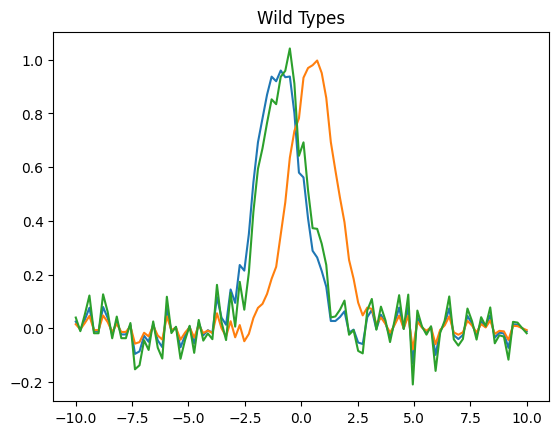

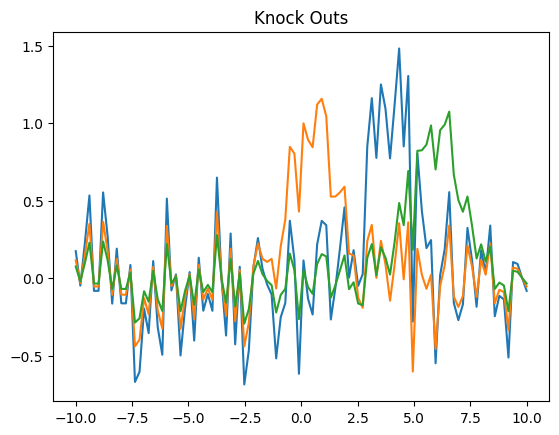

In [115]:
# Quick reminder of the data
import matplotlib.pyplot as plt

# WT
for sample in all_samples.keys():
  if sample.startswith("WT"):
    plt.plot(x_coords,all_samples.get(sample))
plt.title("Wild Types")
plt.show()

# KO
for sample in all_samples.keys():
  if sample.startswith("KO"):
    plt.plot(x_coords,all_samples.get(sample))
plt.title("Knock Outs")
plt.show()


Lets first calculate some basic statistics within our data. Functions like correlations and variance are baked in ready which can be useful.

In [5]:
import numpy as np
import pandas as pd

all_calcs = {}
for sample in all_samples.keys():
    # Requires converting the data into a numpy array format
    y = np.array([all_samples.get(sample)])

    all_calcs[sample] = [np.mean(y), np.std(y), np.max(y)]

# Outputting with pandas
df = pd.DataFrame(all_calcs).T
df.columns = ['Mean', 'Std Deviation', 'Max']

print(df)

          Mean  Std Deviation       Max
WT01  0.118886       0.268866  0.959884
WT02  0.120963       0.271136  0.997139
WT03  0.115770       0.273201  1.042005
KO01  0.087732       0.445575  1.481044
KO02  0.100193       0.344818  1.156858
KO03  0.108499       0.301680  1.073842


Above we are manipulating individual samples, but more powerfully we can use numpy to apply functions accross arrays. Let's merge our arrays at each position for our 3 replicates to have two datasets, and plot them again. (is this statistcally a good idea? Probably not, but lets do it anyway!)

In [6]:
WT_samples = [all_samples["WT01"], all_samples["WT02"], all_samples["WT03"]]
KO_samples = [all_samples["KO01"], all_samples["KO02"], all_samples["KO03"]]

# WT averaging
WT_mean_values = np.mean(WT_samples, axis=0)

# KO averaging
KO_mean_values = np.mean(KO_samples, axis=0)

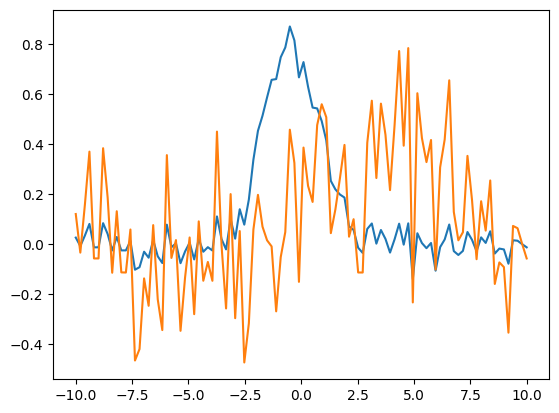

In [59]:
plt.plot(x_coords,WT_mean_values)
plt.plot(x_coords,KO_mean_values)
plt.show()

Using numpy allows us to achive in just a few lines of code what would take 10s of lines if in basic python.

### SciPy

Finally lets do some proper statistical testing using sciPy. NumPy is good for working with arrays, but SciPy builds on this to provide a large number of higher-level processes like more advanced statistics, curve fitting, root finding etc.

In [11]:
from scipy.stats import spearmanr

stat, pvalue = spearmanr(x_coords, KO_mean_values)

print("Spearman Rank test WT01 vs WT02")
print("R2= {} (p={})".format(round(stat,3), round(pvalue, 5)))

Spearman Rank test WT01 vs WT02
R2= 0.289 (p=0.0035)




Although this mock-data is not a good proof of the tests being accurate, you can see how easy to apply the analysis.

#### Exercise: 
- Perform Spearman Rank correlation and Mann-Whitney tests on the samples, vs the WT average data
- Extension: Output not just the p-value but whether significant at p<0.05

In [122]:
from scipy.stats import shapiro, mannwhitneyu, kruskal, spearmanr, wilcoxon

def test_vs_WTavg(sample):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(all_samples[sample])
    print(f"Normality:   Stat = {round(stat,5)} p = {round(p_value,5)}")

# Run for all samples
for sample in all_samples.keys():
    print(sample + "\n====")
    test_vs_WTavg(sample)
    print()


WT01
====
Normality:   Stat = 0.63986 p = 0.0

WT02
====
Normality:   Stat = 0.59321 p = 0.0

WT03
====
Normality:   Stat = 0.71521 p = 0.0

KO01
====
Normality:   Stat = 0.93952 p = 0.00018

KO02
====
Normality:   Stat = 0.92227 p = 2e-05

KO03
====
Normality:   Stat = 0.8384 p = 0.0

